In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
#Pandas for manipulation
import pandas as pd

#NumPy for numericalcomputing
import numpy as np

#Matplotlib and seaboarn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [81]:
#load dataset
df=pd.read_excel('loan.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
#check the missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [83]:
#Handling Missing Values
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [84]:
#Convert Categorial data into numerical data
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Married']=df['Married'].map({'No':0,'Yes':1})
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})

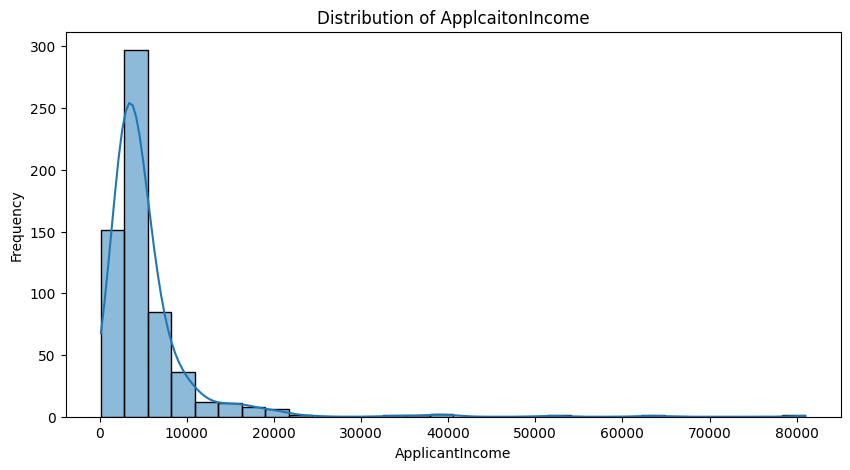

In [85]:
#Visualization foir ApplicantIncome
plt.figure(figsize=(10,5))
sns.histplot(df['ApplicantIncome'],bins=30, kde=True)
plt.title('Distribution of ApplcaitonIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

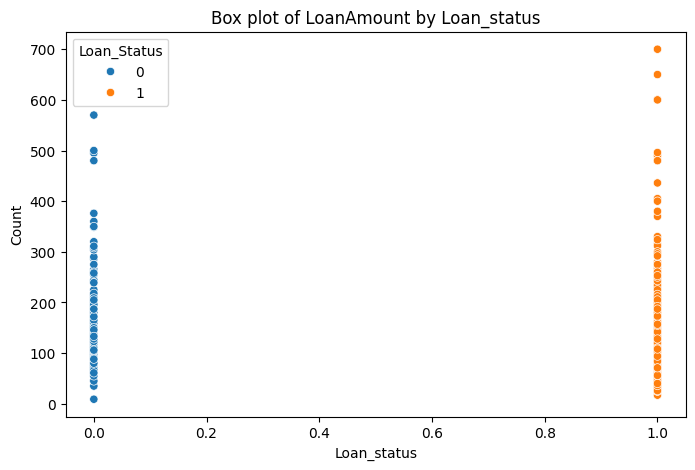

In [86]:
#visualization of LoanAmount
plt.figure(figsize=(8,5))
sns.scatterplot(x='Loan_Status', y='LoanAmount', hue='Loan_Status', data=df, color='custom_color')
plt.title('Box plot of LoanAmount by Loan_status')
plt.xlabel('Loan_status')
plt.ylabel('Count')
plt.show()

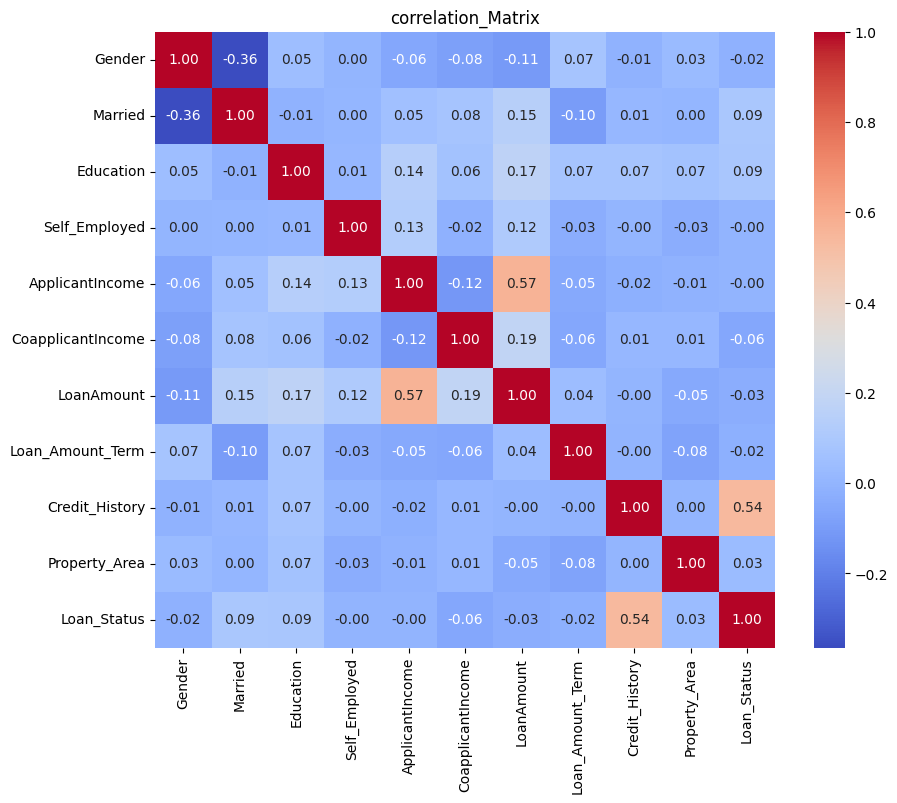

In [87]:
#correlation Analysis
numeric_df = df.select_dtypes(include=['int64','float64'])
#compute correlation matrix
correlation_matrix=numeric_df.corr()
#plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation_Matrix')
plt.show()

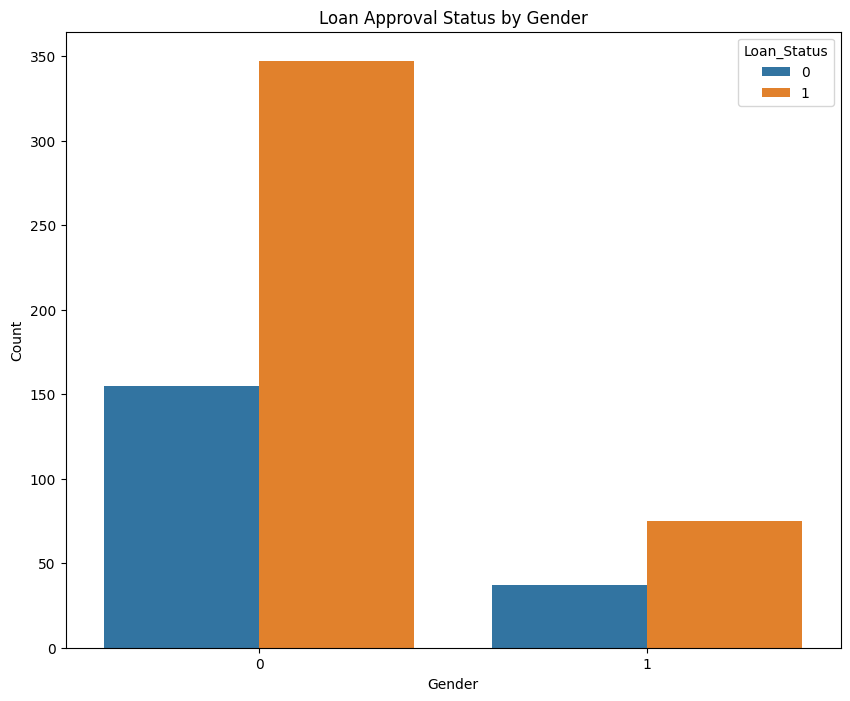

In [88]:
#lets visualize the loan Status data by gender
plt.figure(figsize=(10,8))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

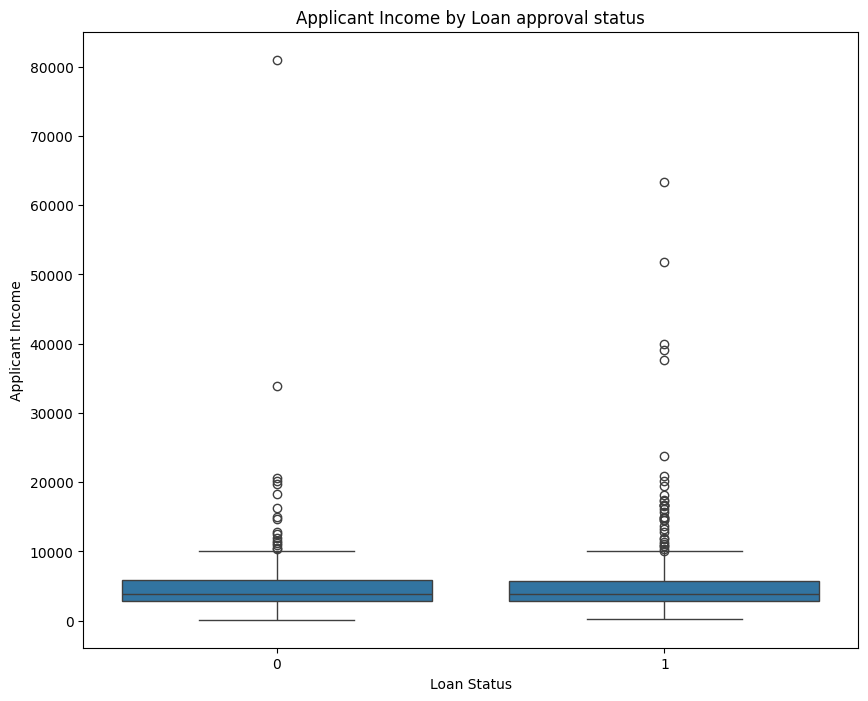

In [89]:
#visualize the loanstatus by ApplicantIncome
plt.figure(figsize=(10,8))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)
plt.title('Applicant Income by Loan approval status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

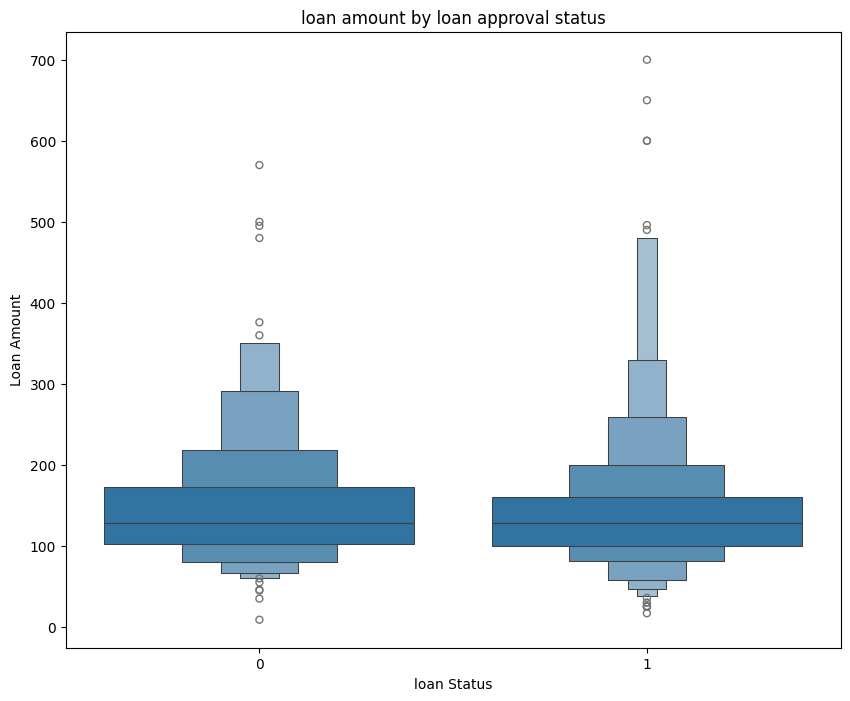

In [90]:
# visualize the loan status by LoanAmount
plt.figure(figsize=(10,8))
sns.boxenplot(x='Loan_Status',y='LoanAmount',data=df)
plt.title('loan amount by loan approval status')
plt.xlabel('loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [91]:
#convert integer prepresentation 
#Statistical Analysis: calculate mean income for approved and not approved loan
mean_income_approved=df[df['Loan_Status']== 1 ]['ApplicantIncome'].mean()
mean_income_not_approved=df[df['Loan_Status']== 0 ]['ApplicantIncome'].mean()
print("Mean Applicant Income for approved Loan:\n", mean_income_approved)
print("Mean Applicant Income for Not approvd Loan:\n ",mean_income_not_approved)

Mean Applicant Income for approved Loan:
 5384.068720379147
Mean Applicant Income for Not approvd Loan:
  5446.078125


In [92]:
# Calculate mean income for approved and not approved loans
mean_income_approved = df[df['Loan_Status'] == 1]['ApplicantIncome'].mean()
mean_income_not_approved = df[df['Loan_Status'] == 0]['ApplicantIncome'].mean()

# Print the results
print("Mean Applicant Income for Approved Loans:", mean_income_approved)
print("Mean Applicant Income for Not Approved Loans:", mean_income_not_approved)

Mean Applicant Income for Approved Loans: 5384.068720379147
Mean Applicant Income for Not Approved Loans: 5446.078125


In [93]:
#Define the numerical feature to be scaled
numerical_feature = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
#initialize the StandardScaler
scalar = StandardScaler()
#Scale the numerical features
df[numerical_feature] = scalar.fit_transform(df[numerical_feature])
#Display the first few row of the dataframe after scaling
print(df.head())

    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       0        0          0          1              0   
1  LP001003       0        1          1          1              0   
2  LP001005       0        1          0          1              1   
3  LP001006       0        1          0          0              0   
4  LP001008       0        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241             360.0   
1        -0.134412          -0.038732   -0.211241             360.0   
2        -0.393747          -0.554487   -0.948996             360.0   
3        -0.462062           0.251980   -0.306435             360.0   
4         0.097728          -0.554487   -0.056551             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             

In [94]:
# perform one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=['Property_Area'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
0,LP001002,0,0,0,1,0,0.072991,-0.554487,-0.211241,360.0,1.0,1,False,False,True
1,LP001003,0,1,1,1,0,-0.134412,-0.038732,-0.211241,360.0,1.0,0,True,False,False
2,LP001005,0,1,0,1,1,-0.393747,-0.554487,-0.948996,360.0,1.0,1,False,False,True
3,LP001006,0,1,0,0,0,-0.462062,0.251980,-0.306435,360.0,1.0,1,False,False,True
4,LP001008,0,0,0,1,0,0.097728,-0.554487,-0.056551,360.0,1.0,1,False,False,True


In [95]:
# perform one-hot encoding on other variables
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed'])
print(df.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002         0.072991          -0.554487   -0.211241             360.0   
1  LP001003        -0.134412          -0.038732   -0.211241             360.0   
2  LP001005        -0.393747          -0.554487   -0.948996             360.0   
3  LP001006        -0.462062           0.251980   -0.306435             360.0   
4  LP001008         0.097728          -0.554487   -0.056551             360.0   

   Credit_History  Loan_Status  Property_Area_0  Property_Area_1  \
0             1.0            1            False            False   
1             1.0            0             True            False   
2             1.0            1            False            False   
3             1.0            1            False            False   
4             1.0            1            False            False   

   Property_Area_2  ...  Married_0  Married_1  Dependents_0  Dependents_1  \
0             True  ...    

In [96]:
#Lets Spilt the dataset into feature and target variable
# Define feature (X) and target variable (y)
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Training set Shape:",X_test.shape, y_test.shape)

Training set shape: (491, 20) (491,)
Training set Shape: (123, 20) (123,)


In [97]:
#Train the XGBoost model
#Initialize the XGBoost classifier
model = xgb.XGBClassifier()
#Fit the model to the training data
model.fit(X_train, y_train)
#Make predication on the testing data
y_pred = model.predict(X_test)
# Evalute the model's performance
#Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
#print the accurqacy score
print("Accuracy", accuracy)


Accuracy 0.7560975609756098


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression()

# Perform cross-validation to evaluate performance
scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy and standard deviation
print("Logistic Regression:")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Logistic Regression:
Mean Accuracy: 0.81
Standard Deviation: 0.02


c:\Users\johri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\johri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Perform cross-validation to evaluate performance
scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy and standard deviation
print("Random Forest:")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Random Forest:
Mean Accuracy: 0.79
Standard Deviation: 0.04


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Initialize Support Vector Machine classifier
svm_classifier = SVC()

# Perform cross-validation to evaluate performance
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy and standard deviation
print("Support Vector Machine:")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Support Vector Machine:
Mean Accuracy: 0.70
Standard Deviation: 0.00


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation to evaluate performance
scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy and standard deviation
print("k-Nearest Neighbors:")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


k-Nearest Neighbors:
Mean Accuracy: 0.74
Standard Deviation: 0.04


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform cross-validation to evaluate performance
scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy and standard deviation
print("Decision Tree:")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


Decision Tree:
Mean Accuracy: 0.69
Standard Deviation: 0.03


Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1-score: 0.86


c:\Users\johri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


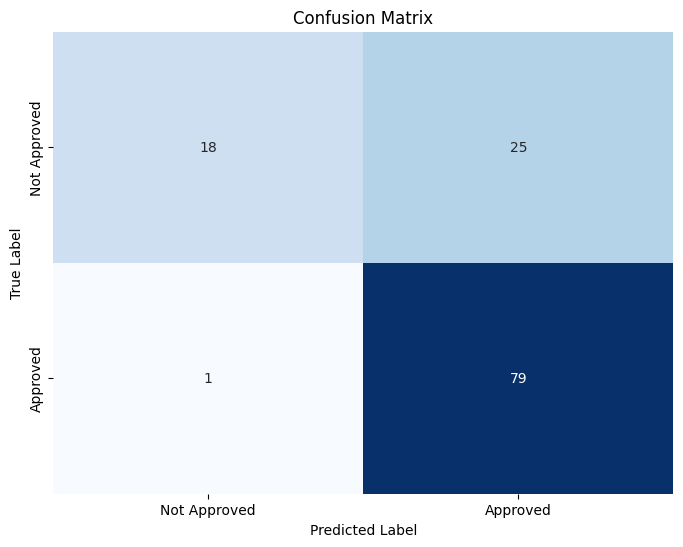

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the Logistic Regression model on the entire training dataset
logistic_regression.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
